Étape 1 : Exploration initiale

1. Affichez les cinq premières lignes des ensembles d’entraînement (TR) et de test (TS).
	
2. Obtenez les dimensions des deux ensembles.

3. Identifiez les types de variables présentes dans les datasets.

In [12]:
import pandas as pd

# Charger les datasets
train_df = pd.read_csv("datasets/train.csv")  # Remplace par le chemin de ton fichier
test_df = pd.read_csv("datasets/train.csv")    # Remplace par le chemin de ton fichier

# 1. Afficher les cinq premières lignes
print("Train dataset (5 premières lignes) :")
print(train_df.head())

# print("\nTest dataset (5 premières lignes) :")
# print(test_df.head())

# 2. Obtenir les dimensions des datasets
print("\nDimensions du dataset d'entraînement :", train_df.shape)
print("Dimensions du dataset de test :", test_df.shape)

# 3. Identifier les types de variables
print("\nTypes de variables du dataset d'entraînement :")
print(train_df.dtypes.value_counts())  # Affiche le nombre de variables de chaque type

print("\nAperçu détaillé des types de données :")
print(train_df.dtypes)


Train dataset (5 premières lignes) :
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleConditi

Si tes datasets sont volumineux, tu peux aussi utiliser .info() pour un aperçu plus rapide :

In [13]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# test_df.info()

1. Identifier les valeurs manquantes et calculer leur pourcentage

In [15]:
# Identifier les valeurs manquantes et calculer leur pourcentage
missing_train = train_df.isnull().sum()
missing_percent_train = (missing_train / len(train_df)) * 100

missing_test = test_df.isnull().sum()
missing_percent_test = (missing_test / len(test_df)) * 100

# Afficher les colonnes avec des valeurs manquantes et leur pourcentage
print("Valeurs manquantes dans le dataset d'entraînement (en %) :")
print(missing_percent_train[missing_percent_train > 0].sort_values(ascending=False))

# print("\nValeurs manquantes dans le dataset de test (en %) :")
# print(missing_percent_test[missing_percent_test > 0].sort_values(ascending=False))


Valeurs manquantes dans le dataset d'entraînement (en %) :
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


2. Afficher des tableaux de statistiques descriptives

In [16]:
# Statistiques descriptives pour le dataset d'entraînement
print("\nStatistiques descriptives du dataset d'entraînement :")
print(train_df.describe())

# # Statistiques descriptives pour le dataset de test
# print("\nStatistiques descriptives du dataset de test :")
# print(test_df.describe())



Statistiques descriptives du dataset d'entraînement :
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799  

Voici une analyse et des propositions pour traiter les valeurs manquantes dans ton jeu de données :

### 1. **Analyse des valeurs manquantes :**

#### Colonnes avec un pourcentage élevé de valeurs manquantes :
- **PoolQC (99.5 %) :** La colonne contient des informations sur la qualité de la piscine, mais la majorité des maisons n'en ont pas, ce qui explique la grande proportion de valeurs manquantes. 
- **MiscFeature (96.3 %) :** Il s'agit d'une colonne liée à des caractéristiques spéciales comme les cabanons ou autres caractéristiques inhabituelles de la propriété, mais peu de maisons possèdent ces caractéristiques.
- **Alley (93.8 %) :** Certaines maisons n'ont pas d'allée, ce qui peut expliquer l'absence de données.
- **Fence (80.8 %) :** La présence de clôtures n'est pas universelle pour toutes les propriétés, d'où le grand nombre de valeurs manquantes.
- **MasVnrType (59.7 %) :** La colonne indique le type de revêtement extérieur en maçonnerie, mais il se peut que certaines maisons n'en aient pas.
- **FireplaceQu (47.3 %) :** Comme pour les autres colonnes liées aux caractéristiques spécifiques des maisons (comme la cheminée), une grande proportion de maisons n'en ont pas.
  
#### Colonnes avec des valeurs manquantes modérées :
- **LotFrontage (17.7 %) :** La longueur de la rue peut être manquante pour certaines propriétés, mais ce n'est pas une proportion excessive.
- **GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond (environ 5.5 %) :** Ces colonnes sont liées au garage, et des maisons sans garage auront des valeurs manquantes dans ces colonnes.
- **Bsmt (ex. BsmtQual, BsmtCond, etc.) (environ 2.5 %) :** Si une maison n'a pas de sous-sol, ces colonnes seront manquantes.

### 2. **Solutions pour traiter les valeurs manquantes :**

#### a) **Colonnes avec des valeurs manquantes massives (> 50 % de valeurs manquantes) :**
- **PoolQC, MiscFeature, Alley, Fence :** Ces colonnes contiennent des informations qui ne s'appliquent pas à la majorité des maisons. On peut :
  - Les **supprimer**, car elles ne sont pas essentielles et peuvent fausser les analyses.
  - **Remplacer par une catégorie "Non applicable"** (par exemple, "No Pool" pour PoolQC) si tu souhaites conserver ces colonnes.

#### b) **Colonnes avec des valeurs manquantes modérées (entre 10 et 50 %) :**
- **MasVnrType et FireplaceQu :** Comme ces colonnes indiquent des caractéristiques qui ne sont pas présentes dans toutes les maisons, tu peux :
  - **Imputer les valeurs manquantes** par la catégorie la plus fréquente, par exemple "None" pour MasVnrType et "No Fireplace" pour FireplaceQu.
  
#### c) **Colonnes avec des valeurs manquantes relativement faibles (< 10 %) :**
- **LotFrontage :** L'imputation par la **moyenne** ou la **médiane** peut être une option ici, étant donné que la proportion de valeurs manquantes n'est pas très élevée. Cependant, il peut être pertinent d'examiner s'il existe des corrélations avec d'autres variables, comme la taille du lot.
- **GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond :** Imputer ces colonnes avec la catégorie la plus fréquente ou avec "No Garage" pourrait être une bonne approche pour les maisons sans garage.

#### d) **Colonnes liées aux sous-sols (Bsmt) :**
- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 :** Si un sous-sol est absent, ces informations seront manquantes. Tu peux :
  - **Imputer par "No Basement"** pour les maisons sans sous-sol.
  
#### e) **Cas spécifiques :**
- **MasVnrArea :** Cette colonne semble être une valeur numérique qui est manquante pour certaines maisons sans revêtement en maçonnerie. L'imputation peut être faite par **0** pour les maisons sans revêtement en maçonnerie ou par la **médiane** des valeurs disponibles.
  
#### f) **Méthode avancée :**
- Si tu souhaites améliorer la précision de l'imputation, tu peux utiliser des techniques comme **l'imputation par régression** ou **l'imputation multiple**, qui utilisent les autres caractéristiques pour estimer les valeurs manquantes.

### 3. **Code pour imputer les valeurs manquantes :*


In [17]:
# Suppression des colonnes avec des valeurs manquantes massives
train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

# Imputation des colonnes avec des catégories manquantes (MasVnrType, FireplaceQu)
train_df['MasVnrType'].fillna('None', inplace=True)
train_df['FireplaceQu'].fillna('No Fireplace', inplace=True)

# Imputation de LotFrontage par la médiane
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)

# Imputation des colonnes Garage par la catégorie "No Garage"
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_columns:
    train_df[col].fillna('No Garage', inplace=True)

# Imputation des colonnes Bsmt par "No Basement"
bsmt_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in bsmt_columns:
    train_df[col].fillna('No Basement', inplace=True)

# Imputation de MasVnrArea par 0 ou la médiane
train_df['MasVnrArea'].fillna(0, inplace=True)


/tmp/ipykernel_13794/1315841463.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('None', inplace=True)
/tmp/ipykernel_13794/1315841463.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [18]:
# Afficher les statistiques descriptives après le traitement
# print(train_df.describe())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
def analyze_numerical_correlations(df):
    """Analyse les corrélations entre variables numériques"""
    # Sélectionner les colonnes numériques
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    corr_matrix = df[numeric_cols].corr()
    
    # Identifier les paires avec corrélation > 0.9
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.9:
                col1, col2 = corr_matrix.columns[i], corr_matrix.columns[j]
                # Calculer la corrélation moyenne de chaque variable avec toutes les autres
                avg_corr1 = corr_matrix[col1].abs().mean()
                avg_corr2 = corr_matrix[col2].abs().mean()
                high_corr_pairs.append({
                    'var1': col1,
                    'var2': col2,
                    'correlation': corr_matrix.iloc[i, j],
                    'to_drop': col1 if avg_corr1 > avg_corr2 else col2,
                    'reason': f"Plus forte corrélation moyenne avec autres variables ({col1 if avg_corr1 > avg_corr2 else col2})"
                })
    
    return corr_matrix, high_corr_pairs
    

In [24]:
def analyze_categorical_correlations(df):
    """Analyse les corrélations entre variables catégorielles avec chi2"""
    cat_cols = df.select_dtypes(include=['object']).columns
    chi2_results = []
    
    for i in range(len(cat_cols)):
        for j in range(i):
            try:
                contingency = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
                chi2, p_value, _, _ = chi2_contingency(contingency)
                # Calculer V de Cramer pour normaliser
                n = contingency.sum().sum()
                min_dim = min(contingency.shape) - 1
                cramer_v = np.sqrt(chi2 / (n * min_dim))
                
                if cramer_v > 0.9:  # Forte association
                    chi2_results.append({
                        'var1': cat_cols[i],
                        'var2': cat_cols[j],
                        'cramer_v': cramer_v,
                        'p_value': p_value
                    })
            except:
                continue
    
    return chi2_results


In [25]:
def apply_pca(df):
    """Applique PCA sur les variables numériques"""
    # Préparer les données
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    X = df[numeric_cols]
    
    # Standardisation
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # Calculer variance expliquée cumulative
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Trouver nombre de composantes pour 95% de variance
    n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
    
    return {
        'pca': pca,
        'X_pca': X_pca,
        'cumulative_variance': cumulative_variance_ratio,
        'n_components_95': n_components_95
    }


In [26]:
# Fonction principale
def main(df):
    # 1. Analyse des corrélations
    print("1. Analyse des corrélations...")
    corr_matrix, high_corr_pairs = analyze_numerical_correlations(df)
    chi2_results = analyze_categorical_correlations(df)
    
    # Variables à supprimer
    to_drop = list(set([pair['to_drop'] for pair in high_corr_pairs]))
    
    # Création du nouveau dataset
    df_reduced = df.drop(columns=to_drop)
    
    # 2. PCA
    print("\n2. Application de PCA...")
    pca_results = apply_pca(df_reduced)
    
    return {
        'correlation_matrix': corr_matrix,
        'high_correlations': high_corr_pairs,
        'chi2_results': chi2_results,
        'variables_dropped': to_drop,
        'df_reduced': df_reduced,
        'pca_results': pca_results
    }


In [27]:
def plot_results(results):
    # Créer une figure avec deux sous-plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Heatmap des corrélations
    sns.heatmap(results['correlation_matrix'], ax=ax1, cmap='coolwarm')
    ax1.set_title('Matrice de corrélation')
    
    # Courbe de variance expliquée PCA
    pca_var = results['pca_results']['cumulative_variance']
    ax2.plot(range(1, len(pca_var) + 1), pca_var, 'bo-')
    ax2.axhline(y=0.95, color='r', linestyle='--')
    ax2.set_title('Variance expliquée cumulative (PCA)')
    ax2.set_xlabel('Nombre de composantes')
    ax2.set_ylabel('Variance expliquée cumulative')
    ax2.grid(True)
    
    plt.tight_layout()
    return fig

1. Analyse des corrélations...

2. Application de PCA...

Variables fortement corrélées (>0.9):

Dimensionnalité originale: 77
Dimensionnalité après suppression des corrélations: 77
Nombre de composantes PCA pour 95% de variance: 27


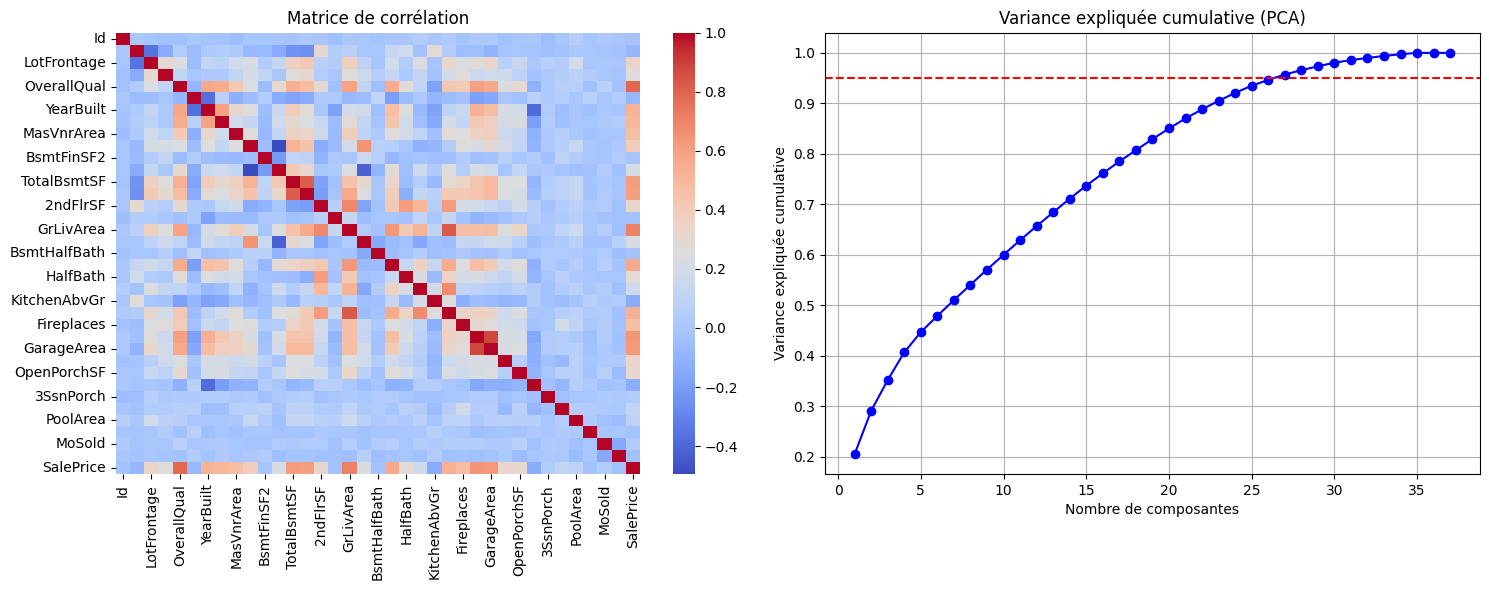

In [29]:
resultats = main(train_df)

print("\nVariables fortement corrélées (>0.9):")
for pair in resultats['high_correlations']:
    print(f"\n{pair['var1']} et {pair['var2']}:")
    print(f"Corrélation: {pair['correlation']:.3f}")
    print(f"Variable à supprimer: {pair['to_drop']}")
    print(f"Raison: {pair['reason']}")

# Afficher la dimensionnalité
print(f"\nDimensionnalité originale: {train_df.shape[1]}")
print(f"Dimensionnalité après suppression des corrélations: {resultats['df_reduced'].shape[1]}")
print(f"Nombre de composantes PCA pour 95% de variance: {resultats['pca_results']['n_components_95']}")

# Créer les visualisations
plot_results(resultats)
plt.show()

Aucune variable n'a été supprimée pour cause de forte corrélation (probablement parce qu'aucune n’a dépassé le seuil de 0.9).
Le PCA a réduit la dimensionnalité de 77 à 27 tout en conservant 95% de la variance.

Interprétation
Puisque aucune variable n’a été supprimée via la matrice de corrélation, cela indique que les variables du dataset ne sont pas fortement redondantes.

Le PCA a permis de réduire la dimensionnalité de plus de 65% (77 → 27) tout en conservant l’essentiel de l’information.
Si l’objectif est la performance d’un modèle, le PCA est à privilégier, car il compresse l’information et accélère les calculs.

Recommandations :

Pour ce dataset spécifique :

La PCA est clairement plus efficace pour la réduction de dimensionnalité
Je recommande d'utiliser les 27 composantes principales si l'objectif est la modélisation prédictive
Garder toutes les variables originales si l'interprétabilité est cruciale

In [31]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [34]:
def analyser_distribution(y, title="Distribution des prix"):
    """
    Analyse et affiche la distribution des prix
    """
    plt.figure(figsize=(12, 6))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data=y, bins=30)
    plt.title(f"{title} - Histogramme")
    plt.xlabel("Prix")
    plt.ylabel("Fréquence")
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=y)
    plt.title(f"{title} - Boxplot")
    plt.xlabel("Prix")
    
    plt.tight_layout()
    
    # Calculer les statistiques descriptives
    stats = {
        'Moyenne': np.mean(y),
        'Médiane': np.median(y),
        'Écart-type': np.std(y),
        'Skewness': pd.Series(y).skew(),
        'Kurtosis': pd.Series(y).kurtosis()
    }
    
    return stats

def categoriser_prix(y):
    """
    Catégorise les prix en classes
    """
    # Utiliser les quantiles pour définir les classes de prix
    q1, q2, q3 = np.percentile(y, [25, 50, 75])
    
    categories = pd.cut(y, 
                       bins=[0, q1, q2, q3, float('inf')],
                       labels=['Bas', 'Moyen-bas', 'Moyen-haut', 'Élevé'])
    
    return categories

def appliquer_smote(X, y_cat):
    """
    Applique SMOTE pour rééquilibrer les données
    """
    # Encoder les catégories en valeurs numériques
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_cat)
    
    # Appliquer SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y_encoded)
    
    # Reconvertir les labels
    y_resampled = le.inverse_transform(y_resampled)
    
    return X_resampled, y_resampled

def afficher_comparaison_distribution(y_orig, y_resampled):
    """
    Affiche la comparaison des distributions avant/après SMOTE
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Distribution originale
    y_orig.value_counts().plot(kind='bar', ax=ax1)
    ax1.set_title('Distribution originale')
    ax1.set_ylabel('Nombre d\'observations')
    
    # Distribution après SMOTE
    pd.Series(y_resampled).value_counts().plot(kind='bar', ax=ax2)
    ax2.set_title('Distribution après SMOTE')
    ax2.set_ylabel('Nombre d\'observations')
    
    plt.tight_layout()
    return fig

def main(df):
    # 1. Analyser la distribution initiale
    stats_orig = analyser_distribution(df['SalePrice'])
    
    # 2. Catégoriser les prix
    prix_categories = categoriser_prix(df['SalePrice'])
    
    # 3. Préparer les features pour SMOTE
    X = df.drop('SalePrice', axis=1)
    
    # Convertir les variables catégorielles en numériques
    X = pd.get_dummies(X)
    
    # 4. Appliquer SMOTE
    X_resampled, y_resampled = appliquer_smote(X, prix_categories)
    
    # 5. Afficher les résultats
    print("\nStatistiques de la distribution originale:")
    for key, value in stats_orig.items():
        print(f"{key}: {value:.2f}")
    
    print("\nDistribution des classes avant rééchantillonnage:")
    print(prix_categories.value_counts())
    
    print("\nDistribution des classes après rééchantillonnage:")
    print(pd.Series(y_resampled).value_counts())
    
    return {
        'X_resampled': X_resampled,
        'y_resampled': y_resampled,
        'prix_categories': prix_categories
    }


Statistiques de la distribution originale:
Moyenne: 180921.20
Médiane: 163000.00
Écart-type: 79415.29
Skewness: 1.88
Kurtosis: 6.54

Distribution des classes avant rééchantillonnage:
SalePrice
Moyen-bas     367
Moyen-haut    366
Bas           365
Élevé         362
Name: count, dtype: int64

Distribution des classes après rééchantillonnage:
Moyen-haut    367
Élevé         367
Moyen-bas     367
Bas           367
Name: count, dtype: int64


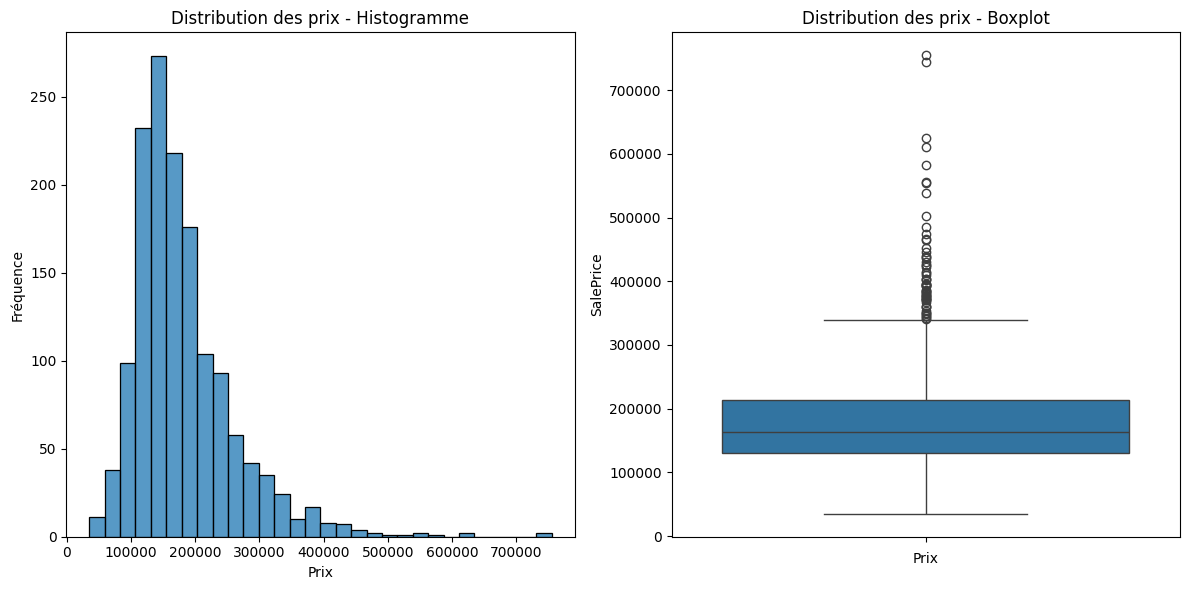

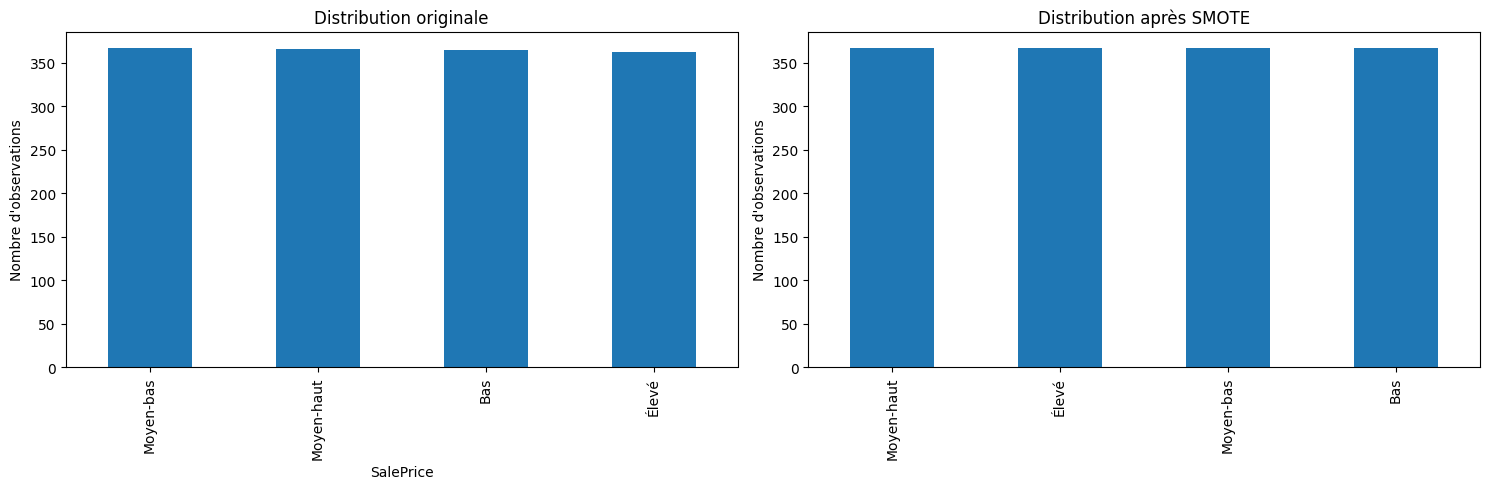

In [35]:
# Exécuter l'analyse
resultats = main(train_df)

# Afficher la comparaison des distributions
afficher_comparaison_distribution(resultats['prix_categories'], 
                                resultats['y_resampled'])
plt.show()

Partie 4 : Modélisation et Évaluation


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report